# 1. Shapiro Wilk Test
To check wether a data sample has a Gaussian Distribution

- H0 : the sample has a normal gaussian distribution
- H1 : the sample does not have a normal gaussian distribution

In [2]:
# importing libraries
import imp
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# loading data
data = pd.read_csv('kashti.csv')
data.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data1 = data['age'].dropna()
data1

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: age, Length: 714, dtype: float64

In [7]:
from scipy.stats import shapiro
# data2 = data1
stat , p = shapiro(data['age'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('probably gaussian distribution')
else:
    print('probably not gaussian distribution')

stat=nan, p=1.000
probably gaussian distribution


<AxesSubplot:>

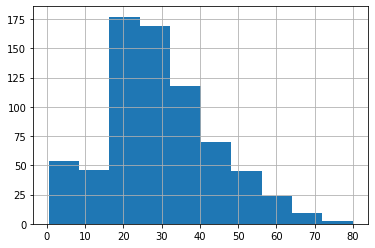

In [8]:
data['age'].hist()

c:\Users\C Collection\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

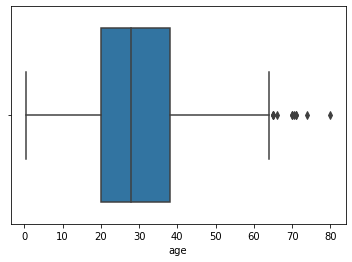

In [9]:
sns.boxplot(data['age'])

In [135]:
# nomality test
from scipy.stats import shapiro
data = data.dropna()
stat , p = shapiro(data['age'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('probably gaussian')
else:
    print('probably not gaussian')

stat=0.991, p=0.284
probably gaussian


<AxesSubplot:>

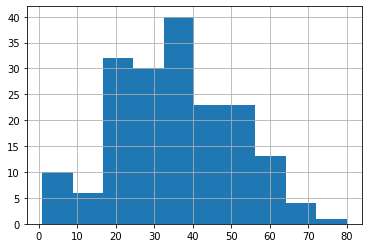

In [136]:
# sns.boxplot(data['age'])
data['age'].hist()

# 2. Correlation test

#### 1. Pearson correlation coefficient 
Test weather the two samples have linear relation or not.

#### Assumptions
- H0 : The two sample are independent
- H1 : Dependancy in samples


In [137]:
from scipy.stats import pearsonr
data1 = data['age']
data2 = data['fare']
stat , p = pearsonr(data1 , data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('probably independent (correlation does not exist)')
else:
    print('probably dependent (correlation exist)')

stat=-0.091, p=0.223
probably independent (correlation does not exist)


#### 2. Spearman's rank coefficient 
Test weather the two samples have mnotonic relation or not.

#### Assumptions
- H0 : The two sample are independent
- H1 : Dependancy in samples

In [138]:
from scipy.stats import spearmanr
data1 = data['age']
data2 = data['fare']
stat , p = spearmanr(data1 , data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('probably independent (correlation does not exist)')
else:
    print('probably dependent (correlation exist)')

stat=-0.073, p=0.330
probably independent (correlation does not exist)


# 3. Chi-squared test

Test weather the two categorical variables are related or independent

#### Assumptions
- H0 : The two sample are independent
- H1 : Dependancy in samples


In [139]:
from scipy.stats import chi2_contingency
table = [[10,20,30],[6,9,17]]
stat , p , dof , expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('probably independent')
else:
    print('probably dependent')

stat=0.272, p=0.873
probably independent


# 4. Parametric Statistical Hypothesis Test

### 1. student's t-test
Test weather the means of two independent samples are significantly different

#### Assumptions
- H0 : The means of samples are equal
- H1 : The means of samples are not equal

In [140]:
from scipy.stats import ttest_ind
data1 = data['age'].dropna()
data2 = data['fare'].dropna()
stat , p = ttest_ind(data1 , data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('probably the same distribution (dataset)')
else:
    print('probably different distribution (dataset)')

stat=-7.481, p=0.000
probably different distribution (dataset)


### 2. Paired student's t-test
Test weather the means of two paired samples are significantly different

#### Assumptions
- H0 : The means of samples are equal
- H1 : The means of samples are not equal

In [141]:
from scipy.stats import ttest_rel
data1 = data['age']
data2 = data['fare']
stat , p = ttest_rel(data1 , data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('probably the same distribution (dataset)')
else:
    print('probably different distribution (dataset)')

stat=-7.351, p=0.000
probably different distribution (dataset)


# 5. Analysis of variance test (ANOVA)
Test weather the means of two or more indepedent samples are significantly different

#### Assumptions
- H0 : The means of samples are equal
- H1 : The means of samples are not equal

In [142]:
from scipy.stats import f_oneway
data1 = data['age']
data2 = data['fare']
# data3 = data['parch']
stat , p = f_oneway(data1 , data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('probably the same distribution (dataset)')
else:
    print('probably different distribution (dataset)')

stat=55.963, p=0.000
probably different distribution (dataset)
